In [154]:
import random
from copy import deepcopy
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline


Would it have made sense for England to deliberately lose their group? Let's do some simulations of both halves of the draw to find out?

How good are the 16 teams? Using their ELO ratings from https://www.eloratings.net/. Hard to tell from this - Japan would have been easier than Colombia, but after that the 2nd place draw looks easier

In [155]:
team_elos = {
        "Uruguay":1954,
        "Russia":1692,
        "Spain":2028,
        "Portugal":1972,
       "France":2007,
       "Denmark":1890,
       "Croatia":1956,
       "Argentina":1918,
       "Brazil":2142,
       "Switzerland":1913,
       "Sweden":1872,
       "Mexico":1843,
       "England":1974,
       "Belgium":1971,
       "Japan":1737,
       "Colombia":1920
 }

What are the two possible draws?

England finish 2nd in group

In [156]:
draw_1 = [
    [
        [
            ['France','Argentina'],
            ['Uruguay','Portugal']
        ],
        [
            ['Brazil','Mexico'],
            ['Belgium','Japan']
        ]
    ],
    [
        [
            ['Spain','Russia'],
            ['Croatia','Denmark']
        ],
    
        [
             ['Sweden','Switzerland'],
             ['England','Colombia']
        ]
    ]
]

England finish top

In [157]:
draw_2 = [
    [
        [
            ['France','Argentina'],
            ['Uruguay','Portugal']
        ],
        [
            ['Brazil','Mexico'],
            ['England','Japan']
        ]
    ],
    [
        [
            ['Spain','Russia'],
            ['Croatia','Denmark']
        ],
    
        [
             ['Sweden','Switzerland'],
             ['Belgium','Colombia']
        ]
    ]
]

Let's use the ELO formula to work a team's winning chances vs. a rival

In [158]:
def get_elo_win_prob(team_1,team_2):
    "Gets the chance of first team winning, given two teams current elo ratings"
    #Formula for elo: e1 = 10^(r1/400)/[10^(r1/400) + 10^(r2/400)]
    rating_1 =  latest_elos[team_1]/400
    rating_2 =  latest_elos[team_2]/400
    q1 = 10.0 ** rating_1
    q2 = 10.0 ** rating_2
    return q1/(q1+q2)

What are England's chances against Brazil?

In [159]:
#So we don't change the global variable - will delete later 
latest_elos = team_elos
england_chance = get_elo_win_prob('England','Brazil')
print("England's win chances: {0:.1%}".format(draw_1_sim['England']))

England's win chances: 7.6%


Simulate game between teams (updates Elos)

In [160]:
def sim_game_and_update_elos(teams):
    team_1, team_2 = teams
    "Sims a game between two teams, returning name of winning team. Aso updates global 'team_elos' values (hot sim)"
    threshold = get_elo_win_prob(team_1,team_2)
    outcome = random.random()
    
    latest_elos[team_1] += (outcome-threshold)*k_factor
    
    latest_elos[team_2] += (threshold-outcome)*k_factor
    
    if outcome <= threshold:
        return team_1
    else:
        return team_2


Simulating 10 games vs. Argentina

In [161]:
for i in range(10):
    print(sim_game_and_update_elos(['England','Argentina']))



England
England
England
Argentina
England
England
England
England
England
England


Now we can simulate the whole tournament

In [162]:
def sim_tournament(tree):
    if isinstance(tree[0],str):
        return sim_game_and_update_elos(tree)
    else:
        first_half = sim_tournament(deepcopy(tree[0]))
        second_half = sim_tournament(deepcopy(tree[1]))
        combined = [first_half,second_half]
        return sim_tournament(combined)

In [163]:
print(sim_tournament(draw_1))

#so we use current rating in all sims - won't be changed by tests above
del latest_elos

Spain


Let's do this multiple times to compare England's winning chances in the two scenarios.

In [164]:
def sim_multiple_tournaments(tree,n,elo_dict):
    win_count = Counter()
    for i in range(n):
        global latest_elos
        latest_elos = deepcopy(elo_dict)
        winner = sim_tournament(tree)
        win_count[winner] += (1.0/n)
    return win_count

def plot_counter(plt_data,title):
    labels, values = zip(*sorted(plt_data.items()))

    indexes = np.arange(len(labels))
    width = 1

    plt.bar(indexes, values, width)
    plt.xticks(indexes, labels,rotation=60)
    plt.ylabel("Tournament win probability")
    plt.title(title)
    plt.show()
    
num_sims = 100000
k_factor = 5

Case 1: England finish 1st in Group

In [165]:
draw_1_sim = sim_multiple_tournaments(draw_1,num_sims,team_elos)

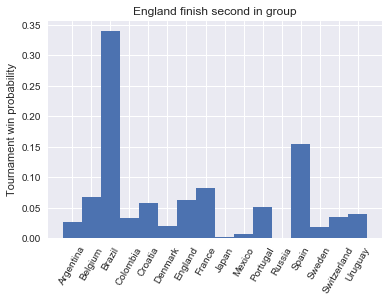

In [166]:

plot_counter(draw_1_sim,"England finish second in group")


Case 2: England finish 2nd

In [167]:
draw_2_sim = sim_multiple_tournaments(draw_2,num_sims,team_elos)


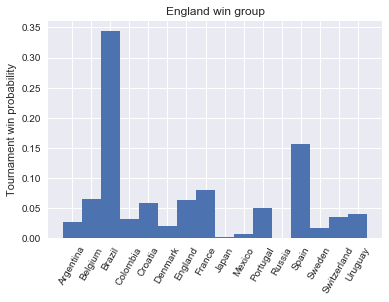

In [168]:
plot_counter(draw_2_sim,"England win group")


In [169]:
print('England finish second in group: {0:.1%} winning chance'.format(draw_1_sim['England']))


England finish second in group: 6.3% winning chance


In [170]:
print('England finish first in group: {0:.1%} winning chance'.format(draw_2_sim['England']))  


England finish first in group: 6.3% winning chance
